# Загрузка библиотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

# Загрузка данных

In [4]:
train = pd.read_parquet('../data/raw/train_dataset_hackaton2023_train.gzip')
test = pd.read_parquet('../data/raw/hackaton2023_test.gzip')

# Базовые статистики тренировочного набора данных

In [5]:
train

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны
...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом


In [6]:
train['group_name'].value_counts()

group_name
train    12129384
Name: count, dtype: int64

### Удалим признак group_name т.к он константный 

In [7]:
train.drop('group_name', axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12129384 entries, 0 to 24261978
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   revenue         float64       
 4   startdatetime   datetime64[us]
 5   dish_name       object        
 6   ownareaall_sqm  float64       
 7   format_name     object        
dtypes: datetime64[us](1), float64(3), int64(2), object(2)
memory usage: 832.9+ MB


In [9]:
train.isnull().sum()

customer_id             0
date_diff_post    2468517
buy_post                0
revenue                 0
startdatetime           0
dish_name               0
ownareaall_sqm          0
format_name             0
dtype: int64

In [10]:
train.describe()

,customer_id,date_diff_post,buy_post,revenue,startdatetime,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,12129384,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2023-02-20 12:19:13.394691,2.155130e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,2022-09-02 00:00:39,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,2022-12-06 16:12:06,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2023-02-22 11:04:22,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,2023-05-09 18:48:02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,2023-08-01 23:57:46,9.787000e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,NaN,1.225907e+02


# Работа с пропусками

### Посмотрим долю пропусков в колонке date_diff_post. Возможно можно будет удалить строки с пропусками, если доля будет небольшая 

In [11]:
train.isnull().sum()['date_diff_post'] / len(train)

0.2035154464563081

### Чуть больше пятой части данных в колонке date_diff_post имеют пропуски - - - > Удалять строки нельзя, так как мы потеряем большой объем данных

### Посмотрим на распределение значений в колонке data_diff_post по значению buy_post, предварительно заполнив пропуски нулями

In [12]:
train_zero_diff = train.copy()

In [13]:
train_zero_diff['date_diff_post'] = train_zero_diff['date_diff_post'].fillna(0)

12.0


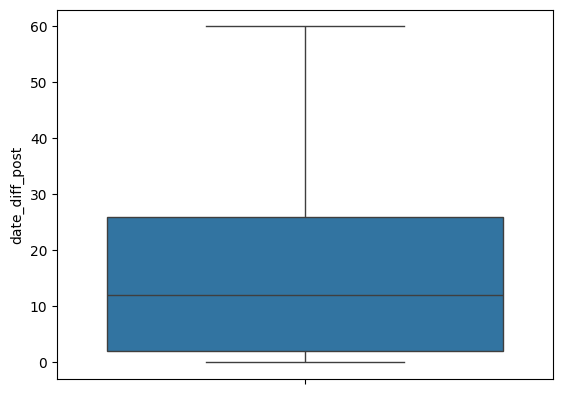

In [14]:
sns.boxplot(train_zero_diff['date_diff_post'])
print(np.median(train_zero_diff['date_diff_post']))

### Посмотрим распределение только для пользователей, которые остались клиентами

17.0


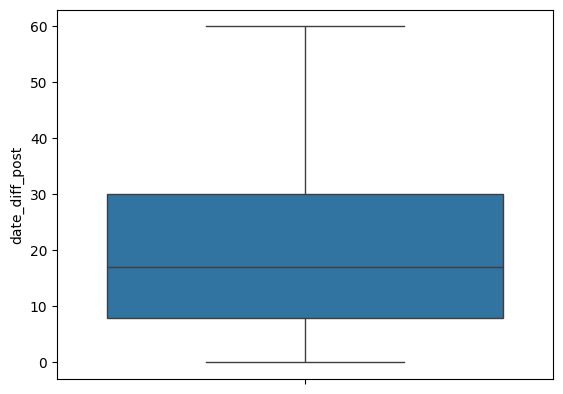

In [15]:
sns.boxplot(train_zero_diff[train_zero_diff['buy_post'] == 1]['date_diff_post'])
print(np.median(train_zero_diff[train_zero_diff['buy_post'] == 1]['date_diff_post']))

### Посчитаем разницу между первым и последним заказом. Это покажет, как долго пользователь был/являестя нашим клиентом

In [16]:
train['MaxMinDelta'] = (
    train.groupby('customer_id')['startdatetime'].transform('max') - train.groupby('customer_id')['startdatetime'].transform('min')
    ).dt.days

In [17]:
train

,customer_id,date_diff_post,buy_post,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,MaxMinDelta
0,29891,9.0,1,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны,57
1,29891,9.0,1,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны,57
2,29891,9.0,1,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны,57
3,29891,9.0,1,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны,57
4,29891,9.0,1,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны,57
...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом,0
24261975,46661804,NaN,0,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом,0
24261976,46661804,NaN,0,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом,0
24261977,46661804,NaN,0,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом,0


### Посмотрим среднее значение признака MaxMinDelta для пользователей, которые перестали быть клиентами

<Axes: xlabel='MaxMinDelta', ylabel='Count'>

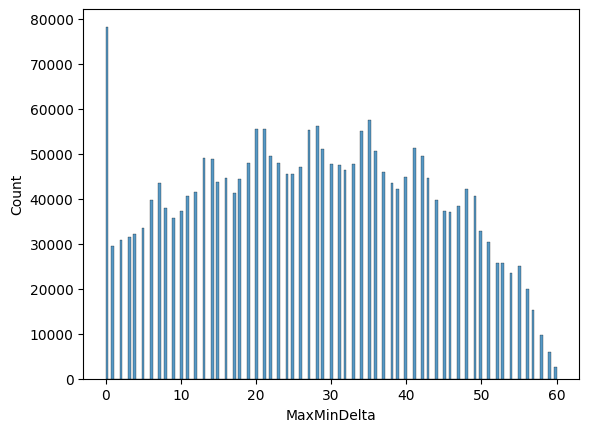

In [18]:
sns.histplot(train[train['buy_post'] == 0 ]['MaxMinDelta'])

In [19]:
median_zero_target = train[train['buy_post'] == 0]['MaxMinDelta'].median()

print(
    f'Медианное значение признак MinMaxDelta клиентов с таргетом 0: {median_zero_target}'
)

Медианное значение признак MinMaxDelta клиентов с таргетом 0: 27.0


### Так же посмотрим распределение этого признака для значений NaN в колонке date_diff_pos

<Axes: xlabel='MaxMinDelta', ylabel='Count'>

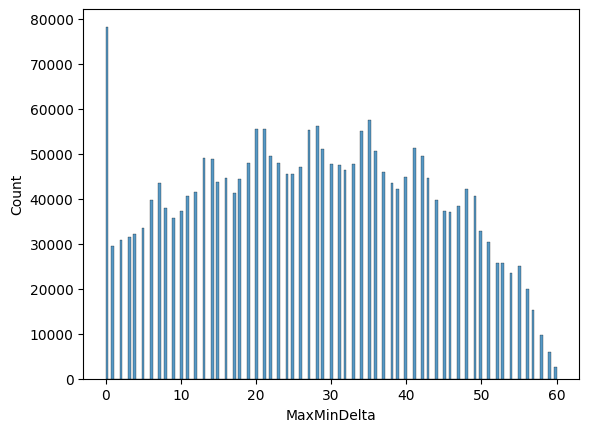

In [20]:
sns.histplot(train[train['date_diff_post'].isna()]['MaxMinDelta'])

In [21]:
median_nan_target = train[train['date_diff_post'].isna()]['MaxMinDelta'].median()

print(
    f'Медианное значение признак MinMaxDelta клиентов с таргетом 0: {median_zero_target}'
)

Медианное значение признак MinMaxDelta клиентов с таргетом 0: 27.0


### Заметим, что распределения и медианные значения одинаковые

### Заполним пропуски нулями, так как мы не имеем достаточно информации для определения приближенных значений date_diff_post

In [22]:
train['date_diff_post'].fillna(
    value=0,
    inplace=True
)

# Работа с категориальными признаками

In [23]:
train

,customer_id,date_diff_post,buy_post,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,MaxMinDelta
0,29891,9.0,1,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны,57
1,29891,9.0,1,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны,57
2,29891,9.0,1,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны,57
3,29891,9.0,1,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны,57
4,29891,9.0,1,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны,57
...,...,...,...,...,...,...,...,...,...
24261974,46661804,0.0,0,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом,0
24261975,46661804,0.0,0,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом,0
24261976,46661804,0.0,0,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом,0
24261977,46661804,0.0,0,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом,0


### Посмотрим количество уникальных признаков в колонке format_name

In [24]:
unique_formats = train['format_name'].unique()

### Мы можем закодировать признак с помощью словаря

In [25]:
format_dict = {
    value: idx  for idx, value in enumerate(unique_formats)
}

In [26]:
format_dict

{'Отдельно стоящий без внешней зоны': 0,
 'Отдельно стоящий с внешней зоной': 1,
 'Фудкорт без туалета': 2,
 'Отдельно стоящий без внешней зоны без туалета': 3,
 'Фудкорт с туалетом': 4,
 'Отдельно стоящий без туалета': 5,
 'Отдельно стоящий': 6,
 'Отдельно стоящий с внешн.зоной без туалета': 7,
 'Не заполнено': 8}

In [27]:
train['format_name'] = train['format_name'].replace(format_dict)

### Посмотрим так же на количество уникальных значений в колонке dish_name

In [28]:
unique_dishes = train['dish_name'].unique()

In [29]:
len(unique_dishes)

1038

### Построим такой же словарь для уникальных значений блюд

In [30]:
dishes_dict = {
    value: idx  for idx, value in enumerate(unique_dishes)
}

In [31]:
dishes_dict

{'Кинг Фри станд': 0,
 'Чикен Тар-Тар': 1,
 'Соус Сырный': 2,
 'Энергет.нап. Адреналин Раш': 3,
 'Латте (СТАНД.)': 4,
 'Чизбургер': 5,
 'Воппер Ролл': 6,
 'ЧизБекон Чикен Гамбургер': 7,
 'Цезарь Кинг новый': 8,
 'Flash Up': 9,
 'Up Цезарь ролл со стрипсами': 10,
 'Соус Горчичный': 11,
 '1RUB.Сырные Медальоны (6 шт.)': 12,
 'Роял Фри new': 13,
 'Цезарь ролл со стрипсами': 14,
 'Влажная салфетка': 15,
 'Сырбургер Чикен New': 16,
 'Айс Твист Клубничный': 17,
 'Двойной Чизбургер': 18,
 'Гранд Чиз': 19,
 'Карт. Деревен. джун': 20,
 'Соус Гриль Особый': 21,
 'Эвервесс Лемон-Лайм джун 0,3л б/л': 22,
 'Горячий Брауни с мороженым': 23,
 '1RUB.Пирожок с вишней': 24,
 'Ангус Камамбер': 25,
 'Латте Пряная Тыква (СТАНД.)': 26,
 'Ангус 4 Сыра': 27,
 'Липтон Грин Дж 0,3': 28,
 'Кинг Фри мал': 29,
 'Сырные Медальоны (3 шт.)': 30,
 'Сандэй Ванильный': 31,
 'Луковые Кольца (3 шт.)': 32,
 'Липтон Грин мал 0,4': 33,
 'Эвервесс Апельсин джун 0,3л б/л': 34,
 'Соус 1000 островов': 35,
 'Чеддер Бекон Чикен': 

In [32]:
train['dish_name'] = train['dish_name'].replace(dishes_dict)

In [34]:
processed_train = train.drop('startdatetime', axis=1)

In [36]:
processed_train.to_csv('../data/processed/processed_train.csv', index=False)